In [1]:
import os
import glob

import pandas as pd
import numpy as np
from uncertainties import ufloat, unumpy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

In [2]:
DIRECTORIES = [os.path.join('Beigang1982.OC.42.19', 'Beigang1982.OC.42.19-analyzed.csv'),
               os.path.join('Beigang1982.PS.26.183', 'Beigang1982.PS.26.183-analyzed.csv'),
               os.path.join('Couturier2019.PRA.99.022503', 'Couturier2019.PRA.99.022503-analyzed.csv'),
               os.path.join('Esherick1977.PRA.15.1920', 'Esherick1977.PRA.15.1920-analyzed.csv'),
               os.path.join('Armstrong1979.JOSA.69.211', 'Armstrong1979.JOSA.69.211-analyzed.csv'),
               os.path.join('Jackson2018.PhD', 'Jackson2018.PhD-analyzed.csv'),
               os.path.join('Philip2007.OC.279.141', 'Philip2007.OC.279.141-analyzed.csv'),
               os.path.join('Kunze1993.ZPD.27.111', 'Kunze1993.ZPD.27.111-analyzed.csv'),
               os.path.join('Dai1995.PRA.52.4416', 'Dai1995.PRA.52.4416-analyzed.csv'),
               os.path.join('Dai1995.JQSRT.54.1019', 'Dai1995.JQSRT.54.1019-analyzed.csv')]

In [3]:
# Goes through all listed .csv files and returns data in a single DataFrame

file_list = DIRECTORIES

def gather_data(file_list):
    
    # Read in .csv files in to single DataFrame
    out = pd.DataFrame()
    for file_name in file_list:
        df = pd.read_csv(file_name)
        
        out = pd.concat([out, df], join='outer', ignore_index=True, sort=False)
    
    return out

out = gather_data(file_list)

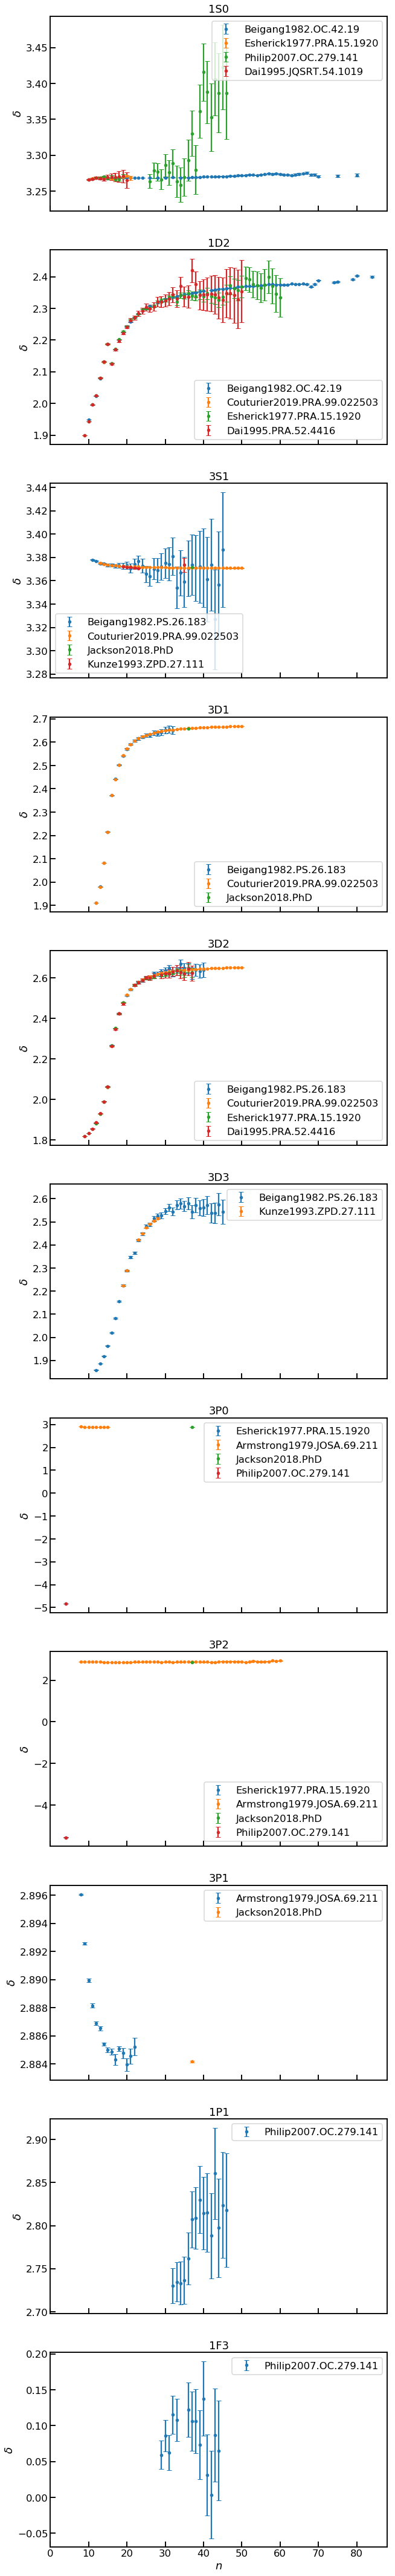

In [4]:
plt_kwargs = {'capsize':4,
              'fmt':'.'}

nrows = len(out['Term'].unique())

if nrows > 1:
    [fig, axs] = plt.subplots(nrows=nrows, ncols=1, figsize=(10,7*nrows), sharex=True, sharey=False)

    for i, T in enumerate(out['Term'].unique()):
        for j, r in enumerate(out[out['Term'] == T]['Reference'].unique()):
            x = out[(out['Term'] == T) & (out['Reference'] == r)]['n']
            y = out[(out['Term'] == T) & (out['Reference'] == r)]['delta_exp']
            yerr = out[(out['Term'] == T) & (out['Reference'] == r)]['delta_exp_unc']
            axs[i].errorbar(x, y, yerr=yerr, label=r, **plt_kwargs, color=sns.color_palette()[j])
        axs[i].legend()
        axs[i].tick_params(axis='both', direction='in')
        axs[i].set_ylabel(r'$\delta$')
        axs[i].set_title(T)
    plt.xlabel(r'$n$')
    plt.show()

else:
    plt.figure(figsize=(10,3))
    
    T = out['Term'].unique()[0]
    
    x = out['n']
    y = out['delta_exp']
    yerr = out['delta_exp_unc']
    plt.errorbar(x, y, yerr=yerr, label=T, **plt_kwargs, color=sns.color_palette()[0])
    plt.legend()
    plt.gca().tick_params(axis='both', direction='in')

    plt.xlabel(r'$n$')
    plt.ylabel(r'$\delta$')
    plt.show()